In [28]:
import os
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [29]:
plt.rcParams.update({
'figure.figsize': (10,6),
'axes.titlesize': 14,
'axes.labelsize': 12,
})


# Create outputs directory
OUT_DIR = Path('outputs')
OUT_DIR.mkdir(exist_ok=True)

In [30]:
EXCEL_PATH = Path('/content/Netflix Dataset.xlsx')
df = pd.read_excel(EXCEL_PATH)


In [31]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [32]:
print('\n--- Basic profiling ---')
print(df.info())
print('\nMissing values:')
print(df.isna().sum())


--- Basic profiling ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7789 non-null   object        
 1   Category      7789 non-null   object        
 2   Title         7789 non-null   object        
 3   Director      5401 non-null   object        
 4   Cast          7071 non-null   object        
 5   Country       7282 non-null   object        
 6   Release_Date  7779 non-null   datetime64[ns]
 7   Rating        7782 non-null   object        
 8   Duration      7789 non-null   object        
 9   Type          7789 non-null   object        
 10  Description   7789 non-null   object        
dtypes: datetime64[ns](1), object(10)
memory usage: 669.5+ KB
None

Missing values:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_

In [33]:
for col in ['type','rating','duration','listed_in','country','date_added','release_year']:
  if col in df.columns:
    print(f"\n{col} unique sample:", df[col].dropna().unique()[:5])

In [34]:
clean = df.copy()

In [35]:
clean.columns = [c.strip() for c in clean.columns]
if 'type' in clean.columns:
  clean['type'] = clean['type'].str.strip().str.title()

In [36]:
# Parse date_added to datetime and extract year/month
if 'Release_Date' in clean.columns:
  clean['date_added'] = pd.to_datetime(clean['Release_Date'], errors='coerce')
  clean['year_added'] = clean['date_added'].dt.year
  clean['month_added'] = clean['date_added'].dt.month
else:
  # fallback: use release_year as proxy
  clean['year_added'] = clean['release_year'] if 'release_year' in clean.columns else np.nan

In [37]:
# Fill missing year_added with release_year if possible
if 'release_year' in clean.columns and 'year_added' in clean.columns:
    clean['year_added'] = clean['year_added'].fillna(clean['release_year'])

In [38]:
df.head(20)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,0.03,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19:00,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59:00,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [39]:
# Normalize text fields
for txt in ['title','director','listed_in','country','cast','rating']:
    if txt in clean.columns:
        clean[txt] = clean[txt].astype(str).replace('nan','').str.strip()

In [40]:
# Parse countries similarly
if 'country' in clean.columns:
  clean['country'] = clean['country'].replace('', np.nan).fillna('Unknown')
  clean['country_list'] = clean['country'].apply(lambda x: [c.strip() for c in x.split(',')] if x!='Unknown' else ['Unknown'])
  clean['primary_country'] = clean['country_list'].apply(lambda L: L[0] if isinstance(L,list) and len(L)>0 else 'Unknown')
else:
  clean['primary_country'] = 'Unknown'

In [41]:
# Parse duration: e.g. '90 min' or '2 Seasons'
def parse_duration(x):
    try:
        if isinstance(x, str):
            if 'min' in x.lower():
                return int(x.lower().replace('min','').strip())
            elif 'season' in x.lower():
                # seasons -> keep seasons count
                return int(''.join(ch for ch in x if ch.isdigit()))
        return np.nan
    except Exception:
        return np.nan

if 'duration' in clean.columns:
    clean['duration_num'] = clean['duration'].apply(parse_duration)
else:
    clean['duration_num'] = np.nan

In [42]:
# Year range to analyze (drop NA)
years = sorted(clean['year_added'].dropna().astype(int).unique())

if years: # Check if the list is not empty
  print('\nYears present:', years[0], '-', years[-1])
else:
  print('\nNo valid years found.')

if 'Category' in clean.columns:
  yearly_type = clean.groupby(['year_added','Category']).size().unstack(fill_value=0).sort_index()
else:
  clean['Category'] = 'Movie'
  yearly_type = clean.groupby(['year_added','Category']).size().unstack(fill_value=0).sort_index()


Years present: 2008 - 2021


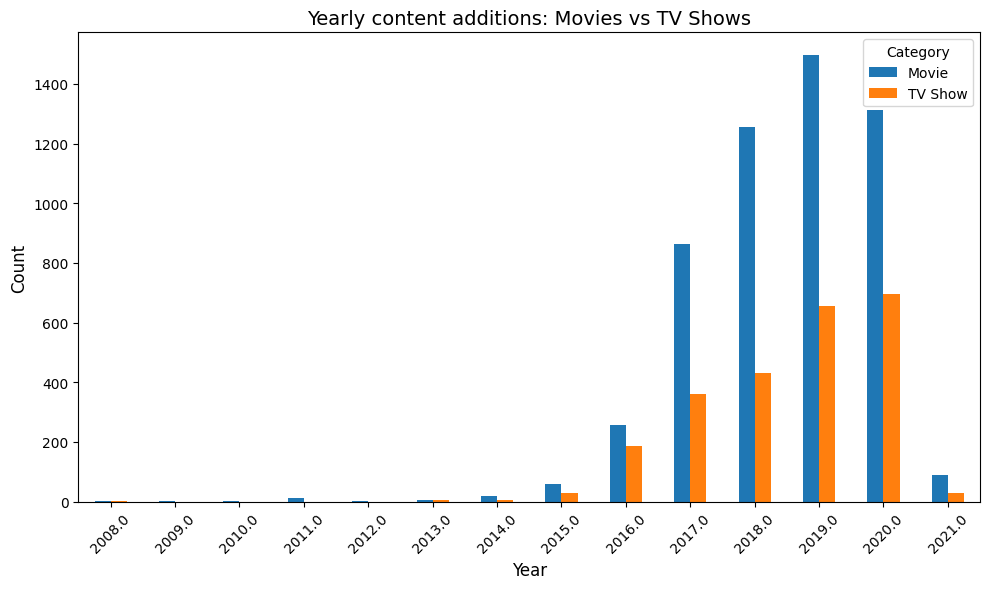

In [46]:
fig, ax = plt.subplots()
if 'Movie' in yearly_type.columns or 'TV Show' in yearly_type.columns:
  yearly_type.plot(kind='bar', stacked=False, ax=ax)
  ax.set_title('Yearly content additions: Movies vs TV Shows')
  ax.set_xlabel('Year')
  ax.set_ylabel('Count')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [52]:
try:
  country_counts = clean['primary_country'].value_counts()
  top_c = country_counts.head(10)
  fig, ax = plt.subplots()
  ax.pie(top_c.values, labels=top_c.index, autopct='%1.1f%%', startangle=140)
  ax.set_title('Top 10 Countries share (by content count)')
  plt.tight_layout()
  fig.savefig(OUT_DIR / 'plot_country_share_pie.png', dpi=150)
  print('Saved:', OUT_DIR / 'plot_country_share_pie.png')
  plt.close(fig)
except Exception as e:
  print('Pie chart failed:', e)

NameError: name 'country_counts' is not defined

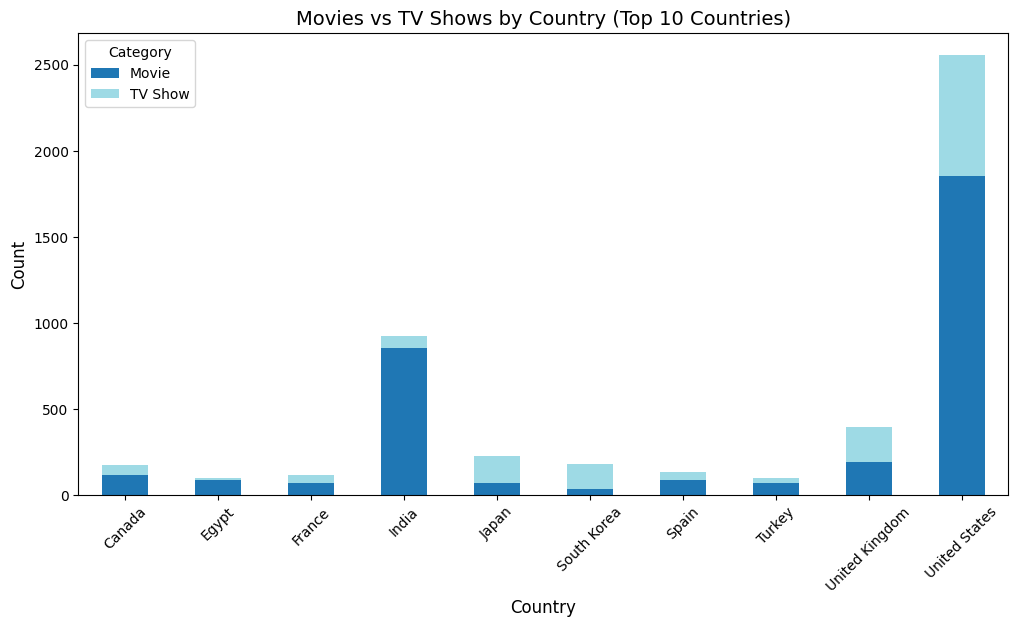

In [53]:
top_countries = df['Country'].value_counts().head(10).index
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)
stacked.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Movies vs TV Shows by Country (Top 10 Countries)")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

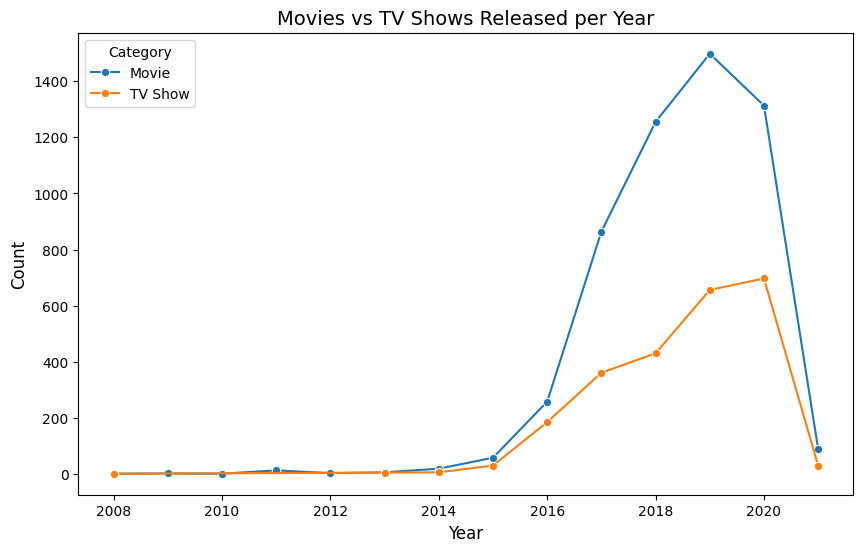

In [55]:
content_trend = clean.groupby(['year_added', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='year_added', y='Count', hue='Category', marker='o')
plt.title("Movies vs TV Shows Released per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [58]:
import plotly.express as px

country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
fig = px.choropleth(country_counts, locations="Country", locationmode="country names",
                    color="Count", hover_name="Country",
                    color_continuous_scale="viridis", title="Netflix Content by Country")
fig.show()

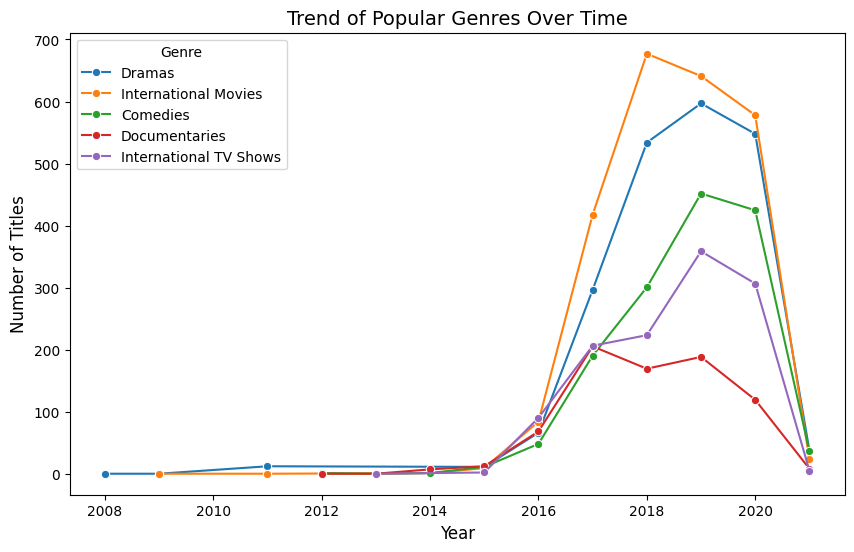

In [60]:
# Split the 'Type' column into individual genres and create a new DataFrame with one row per genre
genre_df = clean.assign(Type = clean['Type'].str.split(', ')).explode('Type')

# Get the top 5 popular genres based on count
popular_genres = genre_df['Type'].value_counts().head(5).index

# Filter the DataFrame to include only the popular genres and group by year and genre to get the count
genre_trends = genre_df[genre_df['Type'].isin(popular_genres)].groupby(['year_added','Type']).size().reset_index(name='Count')

# Plot the trend of popular genres over time
sns.lineplot(data=genre_trends, x='year_added', y='Count', hue='Type', marker="o")
plt.title("Trend of Popular Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.show()